# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Muhammad Rafly Arjasubrata
- **Email:** rraaffllyy22@gmail.com
- **ID Dicoding:** raflyarj

## Menentukan Pertanyaan Bisnis

- Apakah terdapat pola tertentu terkait jumlah polusi udara terhadap suatu waktu tertentu ?
- Apakah terdapat korelasi antara kondisi cuaca tertentu dengan tingkat polusi udara ?
- Apakah terdapat korelasi antara jenis polutan yang satu dengan yang lainnya ?

## Import Semua Packages/Library yang Digunakan

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Data Wrangling

### Gathering Data

Load seluruh dataset dari 12 kota yang berbeda dan menyimpannya di dalam dictionary yang memiliki key nama kota data tersebut berasal dan value merupakan DataFrame dari data cuaca kota tersebut

In [63]:
# Dictionary kosong untuk menyimpan data setiap kota
dfs = {}
for file_name in os.listdir("./PRSA_Data_20130301-20170228") :
    """
    Setiap data disimpan ke dalam dictionary dengan key nama kota dan value DataFrame yang bersangkutan.
    """
    # Load dataset
    dfs[file_name.split('_')[2]] = pd.read_csv(f"./PRSA_Data_20130301-20170228/{file_name}")

# Cek nama kolom dan ukuran data pada setiap dataframe
print("Nama Kolom :", ", ".join(dfs["Aotizhongxin"].columns))

print("\nUkuran Data : ")
for k, df in dfs.items() :
    print(k, ":", df.shape)

Nama Kolom : No, year, month, day, hour, PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, wd, WSPM, station

Ukuran Data : 
Gucheng : (35064, 18)
Huairou : (35064, 18)
Tiantan : (35064, 18)
Changping : (35064, 18)
Guanyuan : (35064, 18)
Nongzhanguan : (35064, 18)
Wanliu : (35064, 18)
Dongsi : (35064, 18)
Wanshouxigong : (35064, 18)
Aotizhongxin : (35064, 18)
Dingling : (35064, 18)
Shunyi : (35064, 18)


Mengubah kolon tahun, bulan, hari, dan jam menjadi datetime agar data mudah diolah. Arah mata angin disederhanakan menjadi 4 arah saja. Kolom yang tidak dibutuhkan juga dihapus. Kolom yang dihapus diantaranya :

- **No**, ini dihapus karena urutan data sudah diwakilkan oleh index dari pandas DataFrame itu sendiri.
- **year, month, day, hour**, ini dihapus karena keempat kolom tersebut sudah digantikan dengan kolom datetime.
- **station**, ini dihapus karena satu dataframe sudah mewakili suatu daerah, dan nama daerah disimpan dalam key dari dictionary dataframe disimpan.

In [64]:
def map_direction(direction):
    """
    Function untuk mengubah 16 arah angin berbeda menjadi 4 arah angin berbeda.
    """
    # Plot arah angin
    sector_mapping = {
        'N': ['NNW', 'N', 'NNE', 'NE'],
        'E': ['ENE', 'E', 'ESE', 'SE'],
        'S': ['SSE', 'S', 'SSW', 'SW'],
        'W': ['WSW', 'W', 'WNW', 'NW']
    }
    for cardinal, sectors in sector_mapping.items():
        if direction in sectors:
            return cardinal

    return direction  # Return arah itu sendiri jika arah tidak ada di plotinggan

# Pengurutan kembali kolom
columns_order = ['datetime', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM']

# Restrukturisasi setiap dataset
for k in dfs.keys() :
    # Membuat variable datetime
    dfs[k]["datetime"] = pd.to_datetime(dfs[k][["year", "month", "day", "hour"]])
    # Menghapus kolom yang tidak perlu
    dfs[k].drop(columns=['No', 'year', 'month', 'day', 'hour', 'station'], inplace=True)
    # Mengurtkan kembali kolom sesuai list columns_order
    dfs[k] = dfs[k][columns_order]
    # Mengubah index menjadi datetime agar mudah diurutkan
    dfs[k].set_index('datetime', inplace=True)
    # 
    dfs[k]['wd'] = dfs[k]['wd'].apply(map_direction)

# Cek hasil restrukturisasi
dfs["Aotizhongxin"].head()

/var/folders/16/qw5g41qj5pjb15h0ws0cbcbw0000gn/T/ipykernel_20823/3302824773.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs[k]['wd'] = dfs[k]['wd'].apply(map_direction)


,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
datetime,,,,,,,,,,,,
2013-03-01 00:00:00,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,N,4.4
2013-03-01 01:00:00,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7
2013-03-01 02:00:00,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,N,5.6
2013-03-01 03:00:00,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,W,3.1
2013-03-01 04:00:00,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0


### Assessing Data

#### **Data Duplikat**

Meninjau nilai duplikat pada seluruh dataset

In [65]:
for k, df in dfs.items() :
    print(k, ":", df.duplicated().sum()) # Melihat jumlah data duplikat setiap tabel

Gucheng : 0
Huairou : 0
Tiantan : 0
Changping : 0
Guanyuan : 0
Nongzhanguan : 0
Wanliu : 0
Dongsi : 1
Wanshouxigong : 0
Aotizhongxin : 0
Dingling : 0
Shunyi : 0


Dapat dilihat dari output ditas, tidak ada data yang duplikat pada seluruh dataframe.

#### **Nilai Missing**

Meninjau apakah ada nilai yang missing atau bernilai null pada seluruh dataset

In [66]:
for k, df in dfs.items() :
    hourly_difference = df.index[1] - df.index[0] # Melihat perbedaan jam

    # Mengecek apakah seluruh data dalam interval satu jam ada
    is_1_hour_step = all((df.index[i+1] - df.index[i]) == hourly_difference for i in range(len(df.index) - 1))

    print(f"is {k} dataset is at 1 hours interval ?", is_1_hour_step)

is Gucheng dataset is at 1 hours interval ? True
is Huairou dataset is at 1 hours interval ? True
is Tiantan dataset is at 1 hours interval ? True
is Changping dataset is at 1 hours interval ? True
is Guanyuan dataset is at 1 hours interval ? True
is Nongzhanguan dataset is at 1 hours interval ? True
is Wanliu dataset is at 1 hours interval ? True
is Dongsi dataset is at 1 hours interval ? True
is Wanshouxigong dataset is at 1 hours interval ? True
is Aotizhongxin dataset is at 1 hours interval ? True
is Dingling dataset is at 1 hours interval ? True
is Shunyi dataset is at 1 hours interval ? True


Dapat dilihat bahwa seluruh dataset sudah dalam interval satu jam dan tidak ada titik data yang terlewat

In [67]:
# Dictionary untuk menampung jumlah missing value
missing_values = {}

for key, df in dfs.items():
    missing_values[key] = df.isna().sum()

missing_values_df = pd.DataFrame(missing_values) # Mengubah jumlah missing value ke dalam tabel DataFrame
missing_values_df

,Gucheng,Huairou,Tiantan,Changping,Guanyuan,Nongzhanguan,Wanliu,Dongsi,Wanshouxigong,Aotizhongxin,Dingling,Shunyi
PM2.5,646,953,677,774,616,628,382,750,696,925,779,913
PM10,381,777,597,582,429,440,284,553,484,718,656,548
SO2,507,980,1118,628,474,446,575,663,669,935,730,1296
NO2,668,1639,744,667,659,692,1070,1601,754,1023,1234,1365
CO,1401,1422,1126,1521,1753,1206,1812,3197,1297,1776,2012,2178
O3,729,1151,843,604,1173,506,2107,664,1078,1719,1214,1489
TEMP,51,51,20,53,20,20,20,20,19,20,53,51
PRES,50,53,20,50,20,20,20,20,19,20,50,51
DEWP,51,53,20,53,20,20,20,20,19,20,53,54
RAIN,43,55,20,51,20,20,20,20,19,20,51,51


Seluruh kolom kecuali datatime pada seluruh dataset memiliki nilai yang null.

#### **Nilai Invalid**

Mencari nilai yang invalid. Pada kolom tertentu nilai tidak mungkin dibawah 0, maka akan dilakukan pengecekan terhadap kolom tersebut

In [68]:
# Mencari nilai yang invalid dalam kolom dibawah
cols_to_check = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'PRES', 'RAIN', 'WSPM']

for k, df in dfs.items() :
    print("Checking for", k)
    for col in cols_to_check :
        if df.loc[df[col] < 0].shape[0] > 0 : # Mengecek apakah ada nilai yang invalid
            print(col, df.loc[df[col] < 0].shape[0])

Checking for Gucheng
Checking for Huairou
Checking for Tiantan
Checking for Changping
Checking for Guanyuan
Checking for Nongzhanguan
Checking for Wanliu
Checking for Dongsi
Checking for Wanshouxigong
Checking for Aotizhongxin
Checking for Dingling
Checking for Shunyi


Tidak ada nilai yang invalid dalam seluruh dataset.

#### **Nilai Outlier**

Mencari nilai outlier yang jauh dari nilai titik pusat data

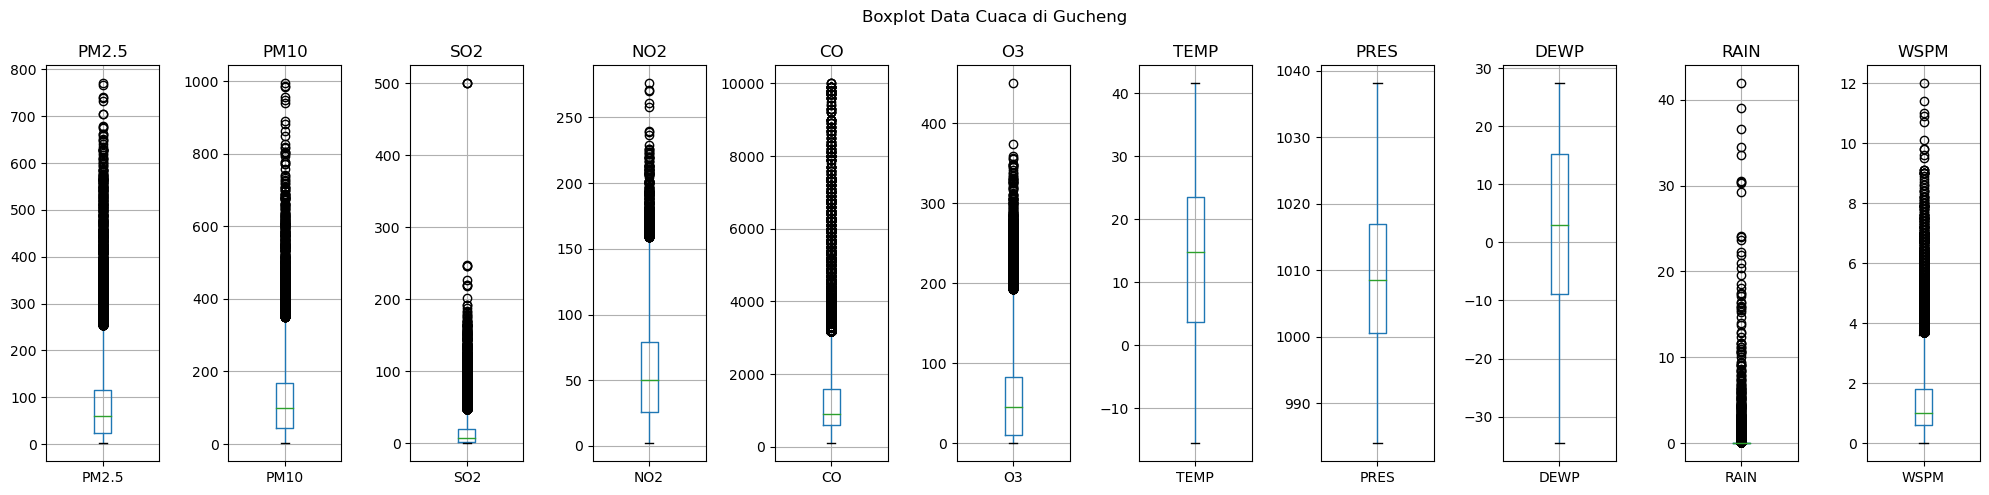

In [69]:
# Mengambil contoh dataframe Gucheng
df = dfs["Gucheng"]
# Inisialisasi nama kolom yang akan dibuat boxplot
cols_to_check = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']

fig, axs = plt.subplots(1, len(cols_to_check), figsize=(20, 5)) # Inisialisasi plot

# Membuat boxplot untuk setiap kolom yang ditinjau
for i, column in enumerate(cols_to_check):
    df[[column]].boxplot(ax=axs[i])
    axs[i].set_title(column)

plt.suptitle("Boxplot Data Cuaca di Gucheng")
plt.tight_layout()
plt.show()


Terdapat banyak outlier pada data numerik, namun jika dilihat dari sifat data cuaca, outlier ini menggambarkan anomali atau representasi kejadian dalam cuaca yang jarang terjadi. Maka data outlier tersebut tidak akan dihapus karena akan dilakukan analisis terhadap anomali tersebut.

### Cleaning Data

#### **Mengisi Nilai Null**

Karena data merupakan data timeseries, linear interpolation digunakan karena jenis interpolation ini dapat mempertahankan pola tren dengan cara mengestimasi nilai antara dua titik data yang diketahui.

Namun, kolom 'wd' merupakan kolom kategorikal dan tidak dapat menggunakan linear interpolation untuk mengisi nilai nullnya, maka nilai null pada kolom 'wd' akan diganti dengan mode dari kolom tersebut.

In [70]:
# Inisialisasi nama kolom untuk dilakukan interpolasi
cols_to_interpolate = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']

# Melakukan interpolasi untuk setiap kolom
for k in dfs.keys() :
    # Interpolasi linear untuk kolom numerik
    dfs[k][cols_to_interpolate] = dfs[k][cols_to_interpolate].interpolate(method='linear', limit_area='inside')

    # Penggantian dengan nilai mode untuk kolom kategorikal
    dfs[k]['wd'].fillna(dfs[k]['wd'].mode()[0], inplace=True)

In [71]:
# Mengecek kembali jumlah missing value
missing_values = {}

for key, df in dfs.items():
    missing_values[key] = df.isna().sum()

missing_values_df = pd.DataFrame(missing_values)
missing_values_df

,Gucheng,Huairou,Tiantan,Changping,Guanyuan,Nongzhanguan,Wanliu,Dongsi,Wanshouxigong,Aotizhongxin,Dingling,Shunyi
PM2.5,0,0,0,0,0,0,0,0,0,0,0,0
PM10,0,0,0,0,0,0,0,0,0,0,0,0
SO2,0,0,0,0,0,0,0,0,0,0,0,0
NO2,20,0,0,0,0,0,0,0,0,0,2,0
CO,0,0,0,0,0,0,0,0,0,0,0,0
O3,0,0,0,0,0,0,0,0,0,0,0,0
TEMP,0,0,0,0,0,0,0,0,0,0,0,0
PRES,0,0,0,0,0,0,0,0,0,0,0,0
DEWP,0,0,0,0,0,0,0,0,0,0,0,0
RAIN,0,0,0,0,0,0,0,0,0,0,0,0


Dapat dilihat masih terdapat 20 baris data yang null pada kolom 'NO2' di kota Gucheng dan 2 baris data di kota Dingling

In [72]:
# Melihat nilai null pada dataset kota Gucheng
dfs["Gucheng"][dfs["Gucheng"].isnull().any(axis=1)]

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
datetime,,,,,,,,,,,,
2013-03-01 00:00:00,6.0,18.0,5.0,NaN,800.0,88.0,0.1,1021.1,-18.6,0.0,W,4.4
2013-03-01 01:00:00,6.0,15.0,5.0,NaN,800.0,88.0,-0.3,1021.5,-19.0,0.0,W,4.0
2013-03-01 02:00:00,5.0,18.0,5.5,NaN,700.0,52.0,-0.7,1021.5,-19.8,0.0,W,4.6
2013-03-01 03:00:00,6.0,20.0,6.0,NaN,650.0,62.5,-1.0,1022.7,-21.2,0.0,W,2.8
2013-03-01 04:00:00,5.0,17.0,5.0,NaN,600.0,73.0,-1.3,1023.0,-21.4,0.0,W,3.6
2013-03-01 05:00:00,4.0,11.0,3.0,NaN,700.0,87.0,-1.8,1023.6,-21.9,0.0,E,1.2
2013-03-01 06:00:00,3.0,6.0,3.0,NaN,700.0,92.0,-2.6,1024.3,-20.4,0.0,E,1.2
2013-03-01 07:00:00,5.0,5.0,3.0,NaN,800.0,86.0,-0.9,1025.6,-20.5,0.0,E,1.1
2013-03-01 08:00:00,5.0,9.0,5.0,NaN,900.0,81.0,0.1,1026.1,-20.3,0.0,E,3.0


In [73]:
# Melihat nilai null pada dataset kota Dingling
dfs["Dingling"][dfs["Dingling"].isnull().any(axis=1)]

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
datetime,,,,,,,,,,,,
2013-03-01 00:00:00,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5
2013-03-01 01:00:00,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,E,0.7


Dari analisa diatas, ini terjadi karena nilai null terjadi pada tanggal '2013-03-01' dimana tanggal tersebut merupakan awal data, sehingga linear interpolation tidak dapat mengisi kekosongan karena tidak ada data awalnya. Maka angka null diatas akan diganti dengan nilai NO2 pada hari selanjutnya di jam yang sama

In [74]:
# Mengganti data null pada kota Gucheng
replaced_value = dfs["Gucheng"].loc['2013-03-02 00:00:00':'2013-03-02 19:00:00', "NO2"]
dfs["Gucheng"].loc['2013-03-01 00:00:00':'2013-03-01 19:00:00', "NO2"] = replaced_value.values

# Mengganti data null pada kota Dingling
replaced_value = dfs["Dingling"].loc['2013-03-02 00:00:00':'2013-03-02 01:00:00', "NO2"]
dfs["Dingling"].loc['2013-03-01 00:00:00':'2013-03-01 01:00:00', "NO2"] = replaced_value.values

Dengan kode diatas, nilai yang hilang pada tanggal 2013-03-01 diganti dengan data pada 2013-03-02 pada jam yang sama.

In [75]:
# Mengecek kembali jumlah missing value pada seluruh dataset
missing_values = {}

for key, df in dfs.items():
    missing_values[key] = df.isna().sum()

missing_values_df = pd.DataFrame(missing_values)
missing_values_df

,Gucheng,Huairou,Tiantan,Changping,Guanyuan,Nongzhanguan,Wanliu,Dongsi,Wanshouxigong,Aotizhongxin,Dingling,Shunyi
PM2.5,0,0,0,0,0,0,0,0,0,0,0,0
PM10,0,0,0,0,0,0,0,0,0,0,0,0
SO2,0,0,0,0,0,0,0,0,0,0,0,0
NO2,0,0,0,0,0,0,0,0,0,0,0,0
CO,0,0,0,0,0,0,0,0,0,0,0,0
O3,0,0,0,0,0,0,0,0,0,0,0,0
TEMP,0,0,0,0,0,0,0,0,0,0,0,0
PRES,0,0,0,0,0,0,0,0,0,0,0,0
DEWP,0,0,0,0,0,0,0,0,0,0,0,0
RAIN,0,0,0,0,0,0,0,0,0,0,0,0


Dapat dilihat bahwa sudah tidak ada nilai NULL pada seluruh dataset

## Exploratory Data Analysis (EDA)

### Explore Struktur dan Bentuk Data

In [76]:
# Melihat informasi dari dataset kota Gucheng
dfs["Gucheng"].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35064 entries, 2013-03-01 00:00:00 to 2017-02-28 23:00:00
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM2.5   35064 non-null  float64
 1   PM10    35064 non-null  float64
 2   SO2     35064 non-null  float64
 3   NO2     35064 non-null  float64
 4   CO      35064 non-null  float64
 5   O3      35064 non-null  float64
 6   TEMP    35064 non-null  float64
 7   PRES    35064 non-null  float64
 8   DEWP    35064 non-null  float64
 9   RAIN    35064 non-null  float64
 10  wd      35064 non-null  object 
 11  WSPM    35064 non-null  float64
dtypes: float64(11), object(1)
memory usage: 4.5+ MB


Dapat dilihat, DataFrame memiliki jenis index DateTime, dimana index tersebut merupakan waktu data udara dicapture. Tedapat 12 kolom dan seluruh kolom kecuali 'wd' memiliki jenis float. Terdpaat baris 35064 data yang dimulai dari 1 Maret 2013 sampai 1 Maret 2017

In [77]:
# Melihat nilai statistik dari dataset kota Gucheng
dfs["Gucheng"].describe(include="all").round(2)

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
count,35064.00,35064.00,35064.00,35064.00,35064.00,35064.00,35064.00,35064.00,35064.00,35064.00,35064,35064.00
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11443,NaN
mean,84.07,119.26,15.71,55.83,1338.10,58.00,13.86,1008.84,2.60,0.06,NaN,1.34
std,82.99,97.53,23.28,36.51,1214.04,57.17,11.29,10.10,13.79,0.84,NaN,1.15
min,2.00,2.00,0.29,2.00,100.00,0.21,-15.60,984.00,-34.60,0.00,NaN,0.00
25%,24.00,45.00,2.00,26.00,600.00,10.00,3.60,1000.50,-9.00,0.00,NaN,0.60
50%,60.00,100.00,7.00,50.00,985.71,45.00,14.80,1008.50,3.00,0.00,NaN,1.00
75%,116.00,167.00,20.00,79.00,1680.65,84.00,23.50,1017.00,15.30,0.00,NaN,1.80


Dengan meninjau nilai min dan max terhadap mean, terdapat nilai yang cukup jauh pada nilai max, namun nilai ini masih dalam batas wajar dan tidak dianggap sebagai anomali.

### Eksplorasi Persebaran Data

/var/folders/16/qw5g41qj5pjb15h0ws0cbcbw0000gn/T/ipykernel_20823/2935362867.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  dfs["Gucheng"][['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']].hist(ax=ax, color='skyblue', edgecolor='black', alpha=0.7)


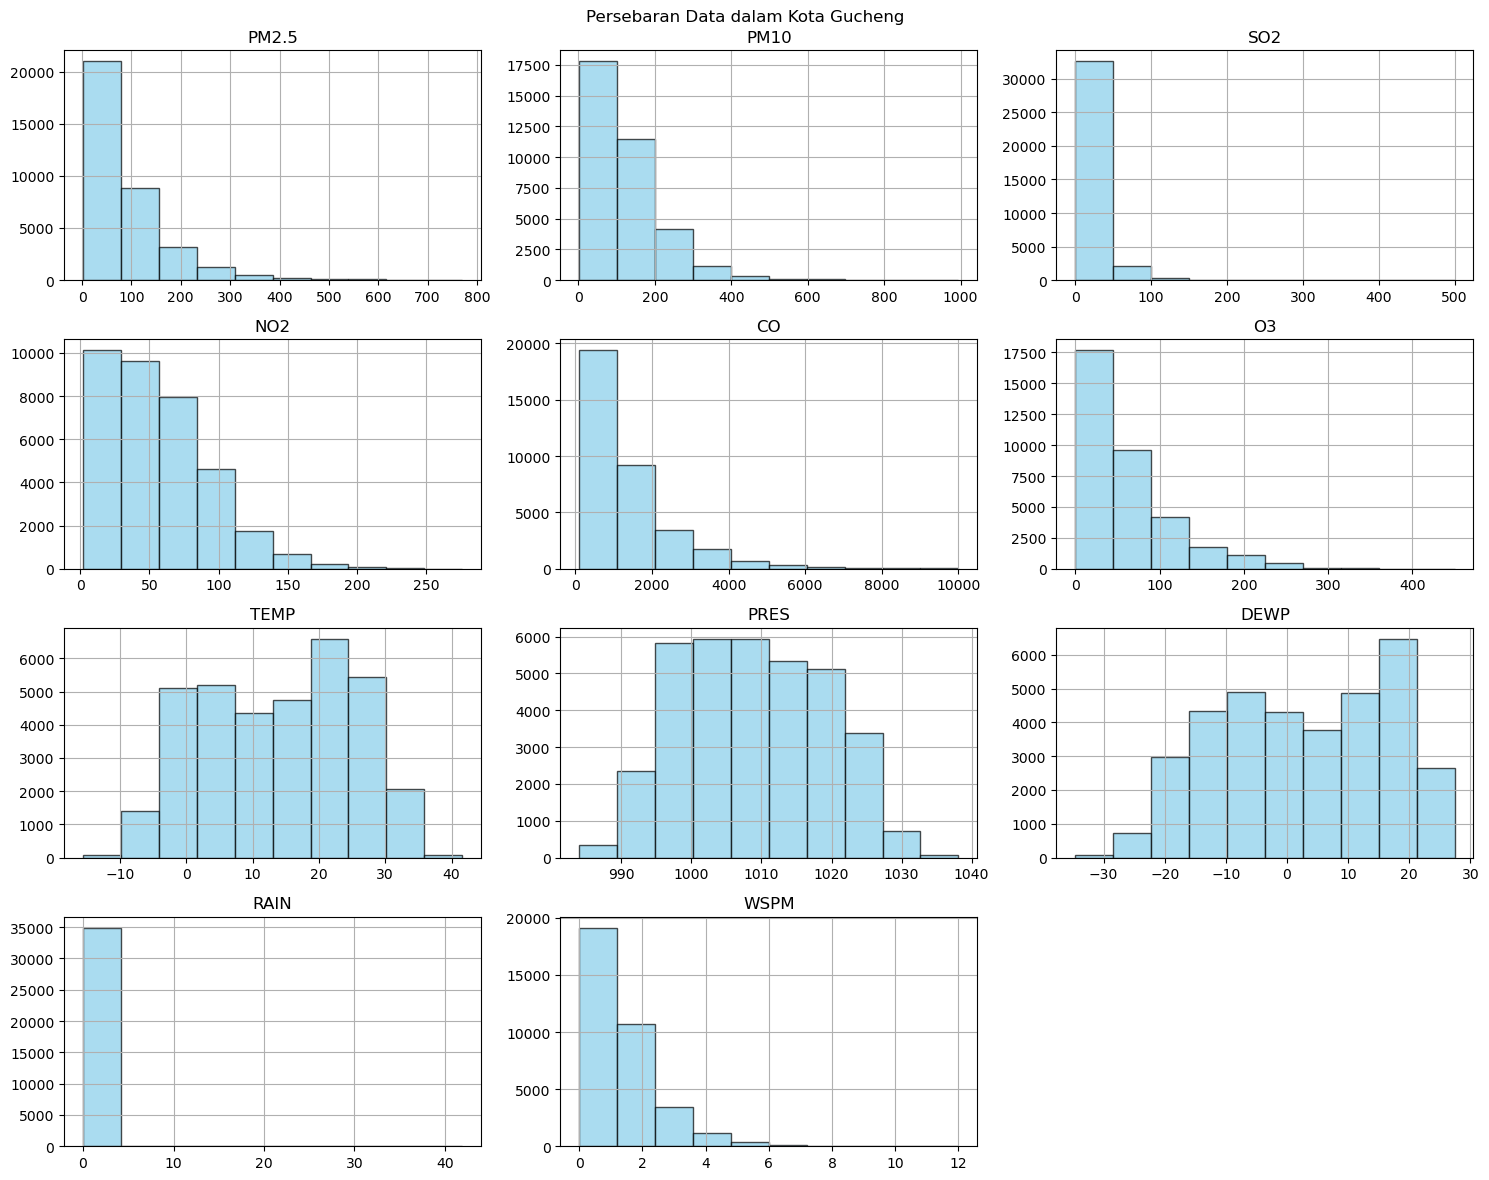

In [90]:
fig, ax = plt.subplots(figsize=(15, 12))

# Membuat histogram untuk seluruh data numerik pada dataset kota Gucheng
dfs["Gucheng"][['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']].hist(ax=ax, color='skyblue', edgecolor='black', alpha=0.7)
ax.grid(True, linestyle='--', alpha=0.5)

ax.set_title('Histograms of Pollution Metrics and Weather Data', fontsize=16)
ax.set_xlabel('Values', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
plt.suptitle("Persebaran Data dalam Kota Gucheng")
plt.tight_layout()

plt.show()

Seluruh metrik polusi memiliki distribusi yang sangat right skewed. Ini menandakan mayoritas jumlah polusi hanya sedikit. Namun, pada beberapa waktu, nilai polusi dalam udara meningkat. Persebaran metrik cuaca seperti TEMP, PRES, dan DEWP memiliki distribusi yang lebih merata, ini menandakan terdapat suatu pola tertentu dalam metrik tersebut. Sama halnya seperti polusi, WSPM memiliki distirbusi right skewed, ini menandakan kecepatan angin pada mayoritas waktu tidak terlalu kencang, namun pada beberapa waktu, terdapat kecepatan angin yang cukup besar. Plot histogram RAIN juga menandakan bahwa kota tersebtu adalah kota yang jarang terkena hujan.


### Eksplorasi Hubungan antar data

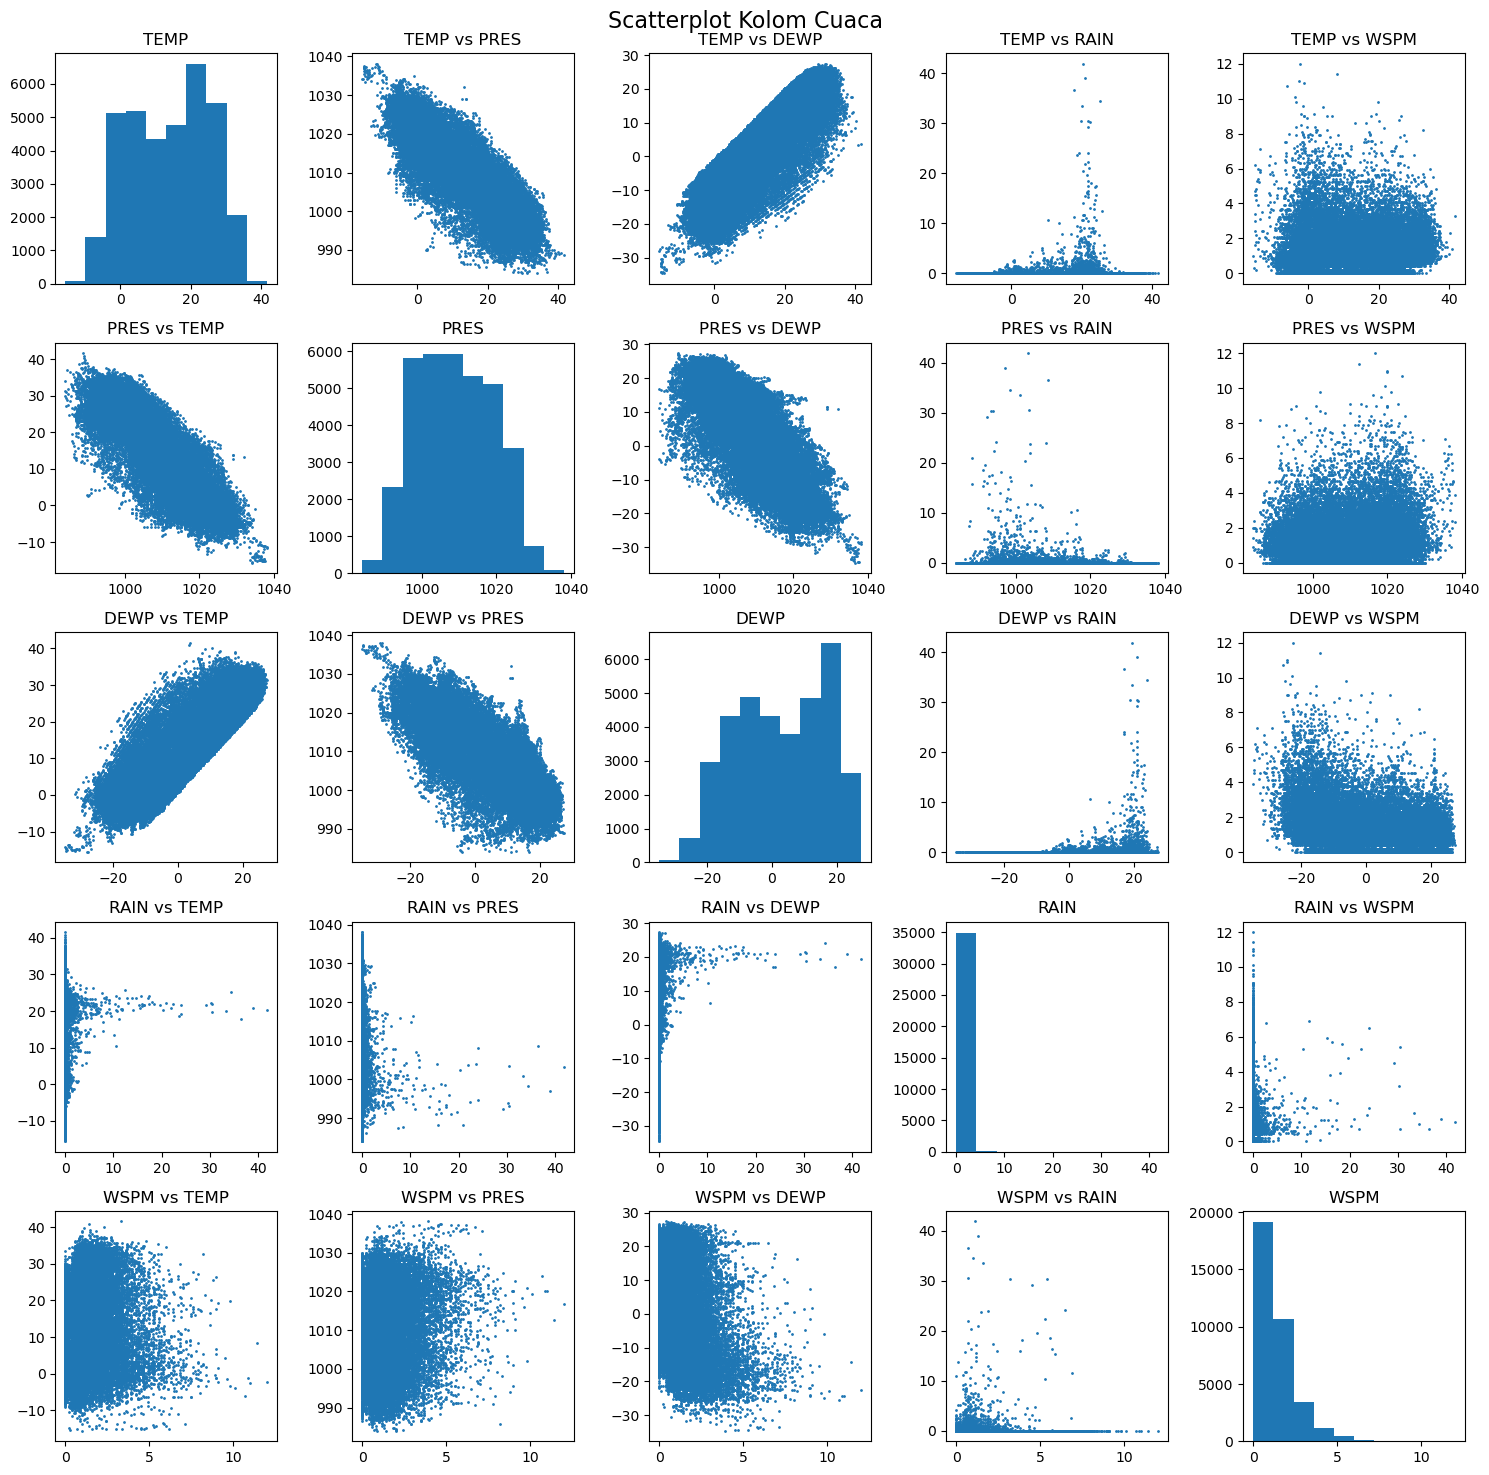

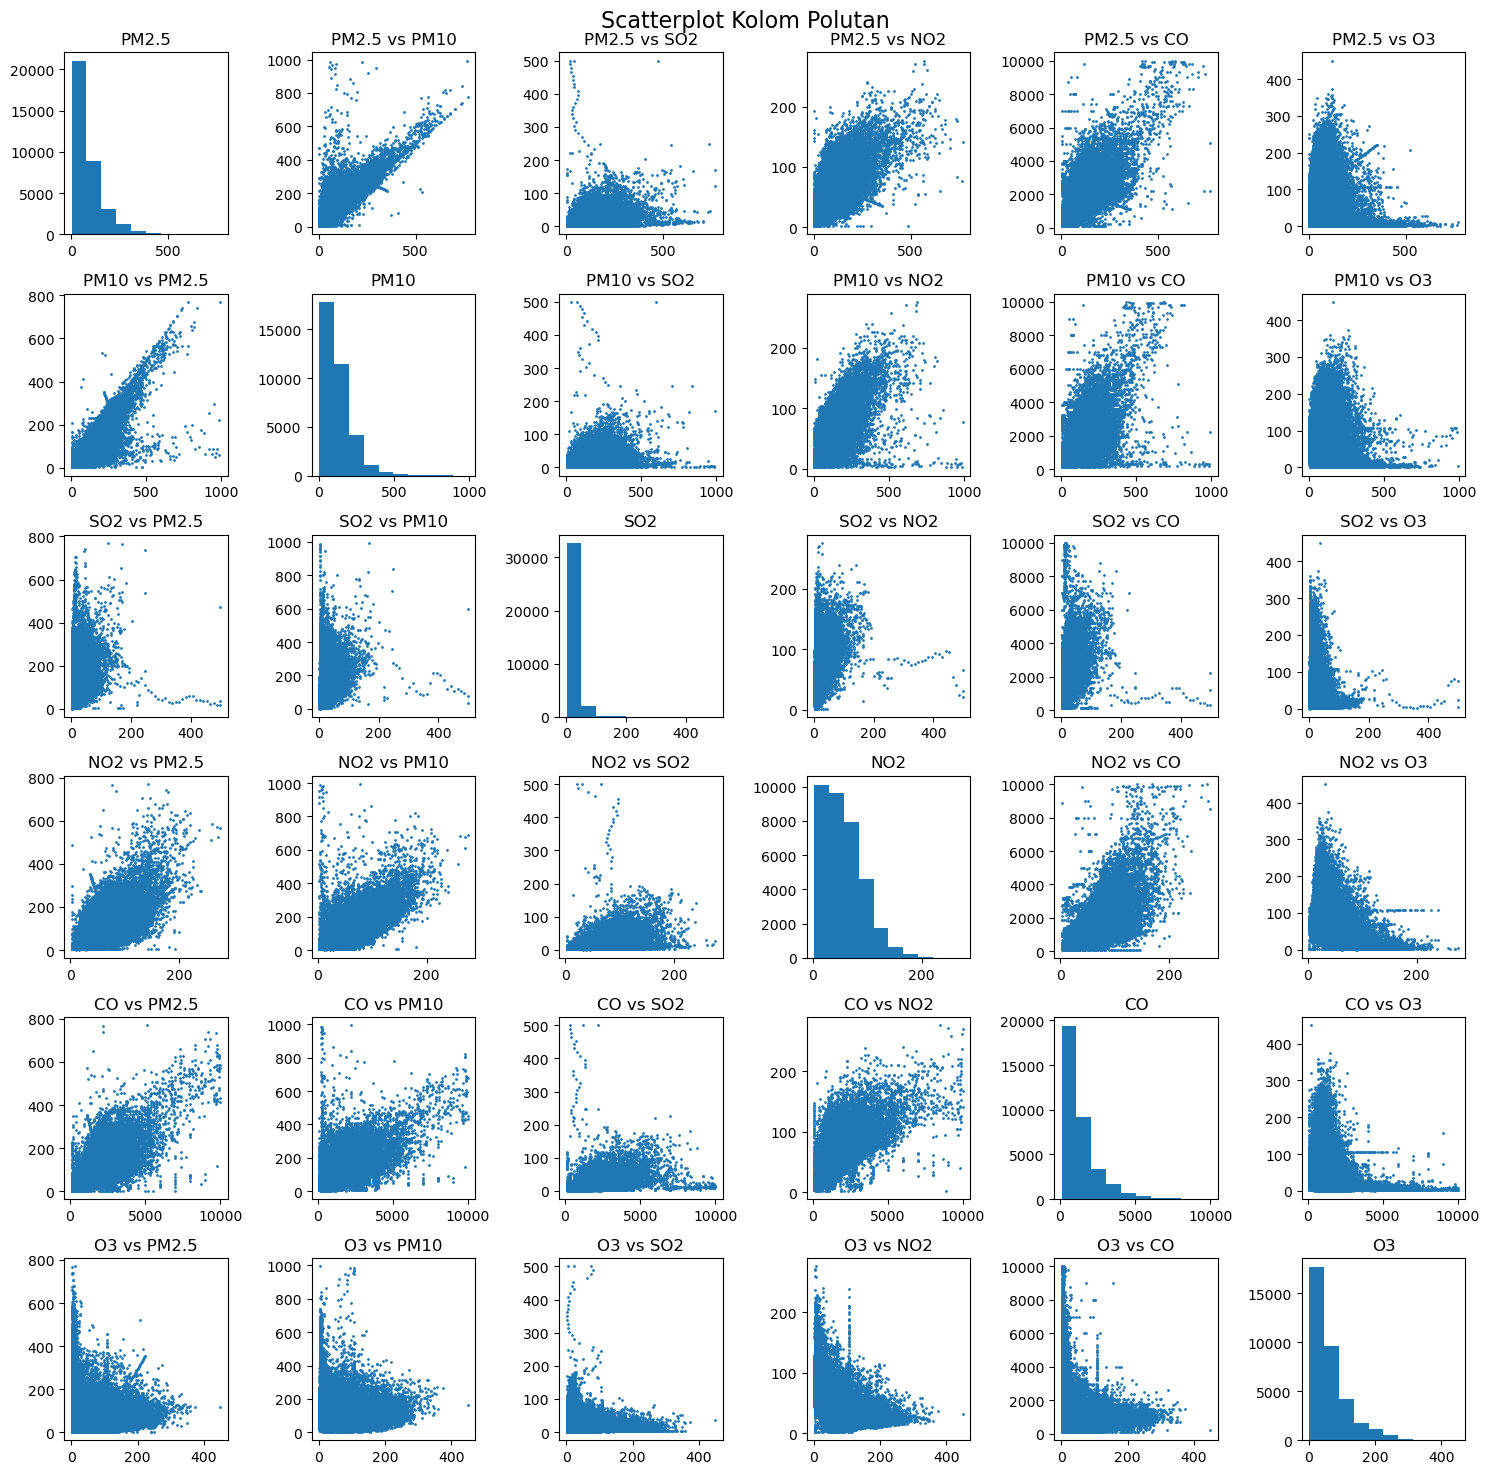

In [79]:
# Membuat dataset yang berisi data cuaca dan data polutan
df_polutant = dfs["Gucheng"].drop(['TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM', 'wd'], axis=1)
df_weather = dfs["Gucheng"].drop(['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'wd'], axis=1)

"""Scatterplot data cuaca"""

# Mengambil nama kolom
columns = df_weather.columns

fig, axs = plt.subplots(5, 5, figsize=(15, 15))

# Membuat scatterplot dan histogram untuk data cuaca
for i in range(len(columns)):
    for j in range(len(columns)):
        if i != j:
            # Scatterplot
            axs[i, j].scatter(df_weather[columns[i]], df_weather[columns[j]], s=1)
            axs[i, j].set_title(f"{columns[i]} vs {columns[j]}")
        else:
            # Histogram
            axs[i, j].hist(df_weather[columns[i]])
            axs[i, j].set_title(f"{columns[i]}")

plt.suptitle("Scatterplot Kolom Cuaca", fontsize=16)
plt.tight_layout()
plt.show()

"""Scatterplot data polutan"""

# Mengambil nama kolom
columns = df_polutant.columns

fig, axs = plt.subplots(6, 6, figsize=(15, 15))

# Membuat scatterplot dan histogram untuk data polutan
for i in range(len(columns)):
    for j in range(len(columns)):
        if i != j:
            # Scatterplot
            axs[i, j].scatter(df_polutant[columns[i]], df_polutant[columns[j]], s=1)
            axs[i, j].set_title(f"{columns[i]} vs {columns[j]}")
        else:
            # Histogram
            axs[i, j].hist(df_polutant[columns[i]])
            axs[i, j].set_title(f"{columns[i]}")

plt.suptitle("Scatterplot Kolom Polutan", fontsize=16)
plt.tight_layout()
plt.show()

Hasil analisis pada scatterplot cuaca :
- TEMP memiliki korelasi negatif dengan PRES dan DEWP
- PRES memiliki korelasi negatif dengan DEWP

Hasil analisis pada scatterplot polutant :
- Seluruh polutant cenderung memiliki korelasi negatif satu sama lain kecuali O3
- O3 cenderung memiliki korelasi negatif dengan polutant lainnya

## Visualization & Explanatory Analysis

### Pertanyaan 1 : **Apa hubungan antar metrik polutan ?**

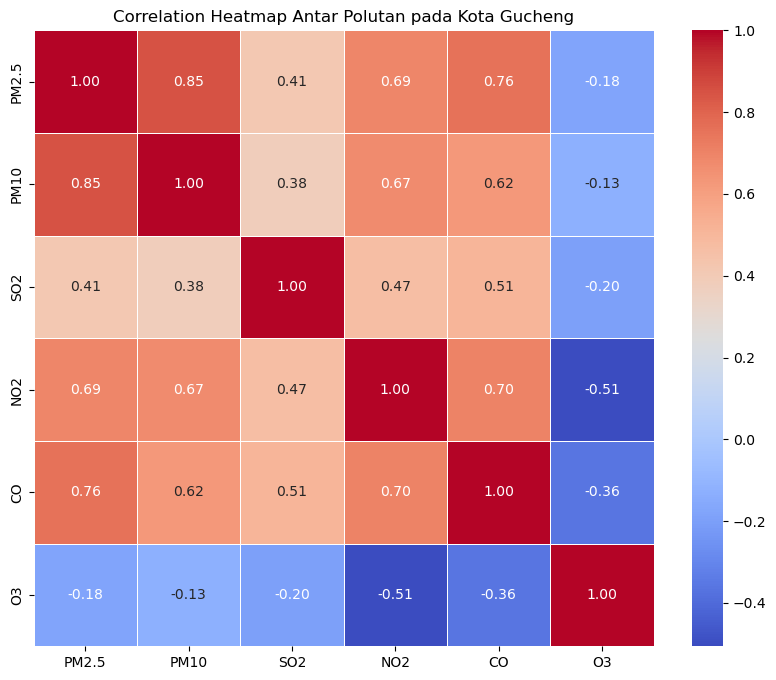

In [106]:
# Membuat matriks korelasi dari kolom polutan
correlation_matrix = dfs["Gucheng"][['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].corr()

plt.figure(figsize=(10, 8))
# Plot matriks korelasi heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap Antar Polutan pada Kota Gucheng')
plt.show()

Dari correlation heatmap metrik polusi kota Gucheng diatas, dapat dilihat bahwa seluruh metrik polusi memilii korelasi positif sedang sampai kuat, kecual O3. O3 memiliki korelasi negatif lemah terhadap semua metrik polusi lainnya dan memiliki korelasi negatif sedang dengan NO2.

### Pertanyaan 2 : **Apa hubungan antar metrik cuaca ?**

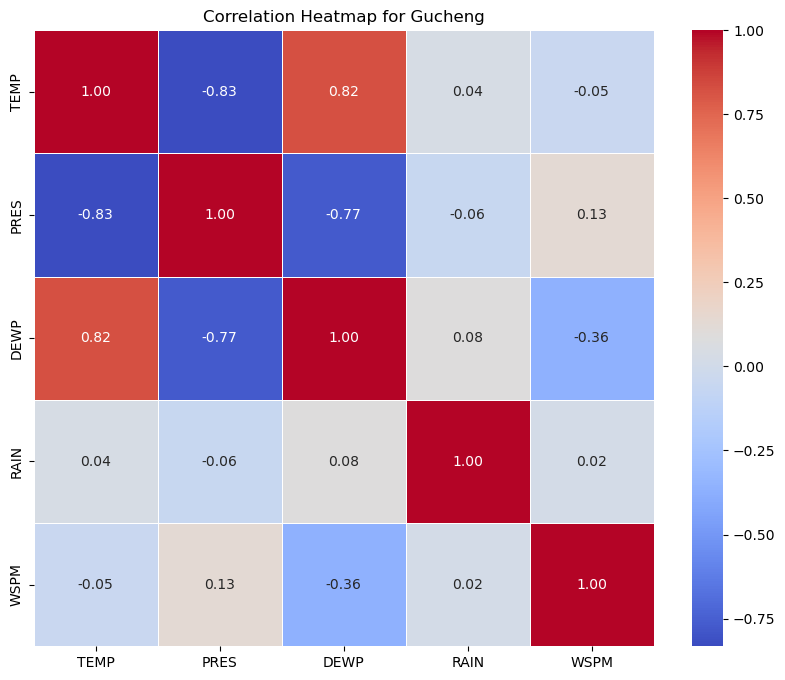

In [81]:
# Membuat matriks korelasi dari kolom cuaca
correlation_matrix = dfs["Gucheng"][['TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']].corr()

plt.figure(figsize=(10, 8))
# Plot matriks korelasi heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap Antar Cuaca pada Kota Gucheng')
plt.show()

Terdapat beberapa informasi yang didapatkan tentang pola cuaca dari correlation matrix diatas :
- Suhu (TEMP) dan kelembapan (DEWP) memiliki korelasi positif kuat, ini menunjukkan bahwa terdapat keterikatan yang erat terhadap suhu udara dan kelembapan udara. Dimana suhu yang tinggi berarti kelembapan udara juga cenderung tinggi.

- Suhu (TEMP) dan tekanan udara (PRES) memiliki korelasi negatif kuat. Ini menunjukkan bahwa ketika suhu udara naik, tekanan atmosfer cenderung turun. Hal ini merepresentasikan perilaku udara dimana peningkatan suhu pada udara menyebabkan udara menjadi lebih ringan yang menyebabkan penurunan tekanan atmosfer.

- Tekanan udara (PRES) dan kelembapan (DEWP) memiliki korelasi negatif kuat ini dikarenakan kedua variable tersebut memiliki keterikatan dengan suhu, dimana jika suhu naik maka tekanan udara turun dan kelembapan tinggi, maka kedua variabel ini memiliki korelasi negatif.

### Pertanyaan 3 : **Apa hubungan antar metrik cuaca dengan polutan ?**

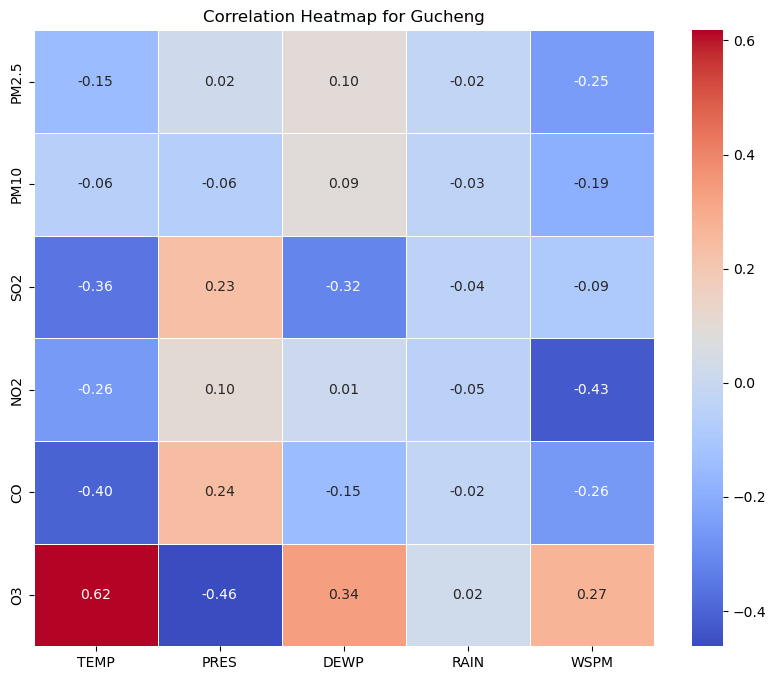

In [82]:
# Membuat matriks korelasi dari kolom polutan dengan cuaca
correlation_matrix = dfs["Gucheng"][['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']].corr().iloc[:6, 6:]

plt.figure(figsize=(10, 8))
# Plot matriks korelasi heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title(f'Correlation Heatmap Antara Polutan dan Cuaca pada Kota Gucheng')
plt.show()

Dari hubungan variabel cuaca dan polusi diatas, dapat diambil beberapa kesimpulan
- Nilai O3 sangat dipengaruhi oleh temperatur udara (TEMP) dimana saat panas, nilai O3 cenderung tinggi dan sedikit dipengaruhi oleh kecepatan angin (WSPM)
- Nilai CO,NO2,SO2 memiliki korelasi negatif dengan temperatur udara (TEMP) yang berarti ketiga nilai tersebut cenderung tinggi.
- Nilai NO2 juga dipengaruhi oleh kecepatan angin (WSPM), dimana kecepatan angin yang rendah cenderung meningkatkan nilai NO2 dalam udara.

Beberapa nilai diatas juga memiliki hubungan dengan DEWP dan PRES, namun seperti yang sudah diketahui bahwa DEWP dan PRES memiliki hubungan kuat dengan temperatur udara, maka dapat disimpulkan bahwa faktor penentu disini adalah temperatur udara.

### Pertanyaan 4 : **Apakah terdapat pola arah angin tertentu dalam kota Gucheng pada 2016 ?**

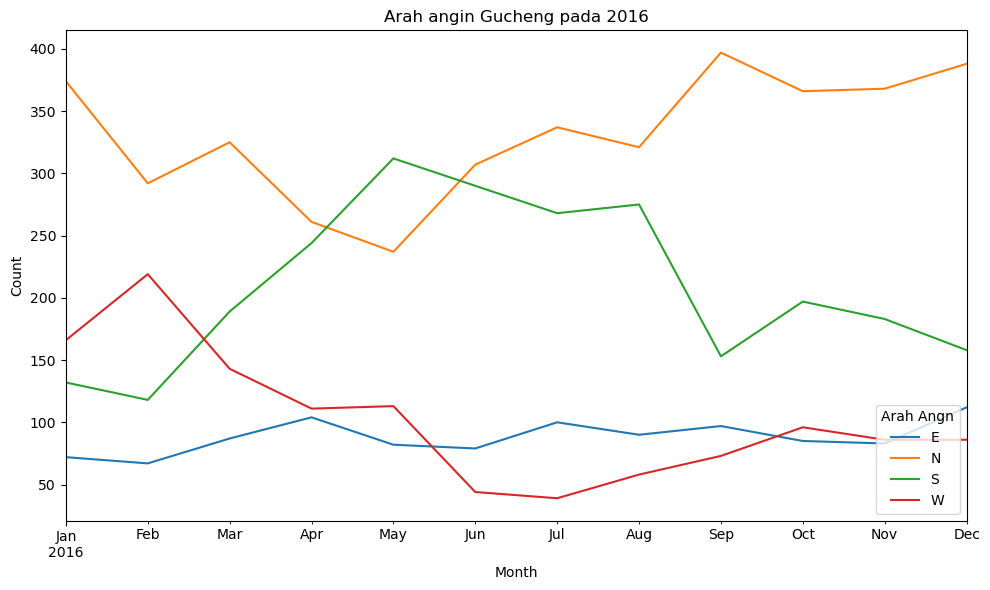

In [105]:
# Mengambil data jumlah arah angin di kota Gucheng pada 2016 yang digroup setiap bulan
monthly_wind_speed = dfs["Gucheng"]['2016-01-01':'2016-12-31'].groupby('wd').resample('M').size()
monthly_wind_speed = monthly_wind_speed.reset_index(name='count')

# Plot hasil menjadi linechart
pivot_df = monthly_wind_speed.pivot(index='datetime', columns='wd', values='count').fillna(0)
pivot_df.plot(kind='line', figsize=(10, 6))

plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Arah angin Gucheng pada 2016')
plt.legend(title='Arah Angn', loc='lower right')
plt.tight_layout()

plt.show()


Dari pola angin kota Gucheng tahun 2016, dapat dilihat bahwa intensitas angin pada awal tahun cenderung tinggi dan dominasi pada arah North, awal pertengahan tahun menunjukan bahwa intensitas arah angin South meningkat, namun pada akhir pertengahan tahun, intensitas angin arah North kembali meningkat.

In [97]:
def plot_trend(col_name, city_name=dfs.keys()) :
    # Inisialisasi plot
    fig, ax = plt.subplots(figsize=(15,5))

    # Plot untuk setiap kota
    for city_name in dfs.keys() :
        # Ambil kolom yang ditinjau
        df = dfs[city_name][[col_name]]

        # Data diresample menjadi mingguan dan dihitung rata-rata dari data satu minggu
        weekly_average = df.resample('W').mean()

        # Loop untuk plot setiap tahun
        for year in range(2013, 2017):
            # Filter data dalam tahun yang ditinjau
            filtered_df = weekly_average.loc[f'{year}-01-01':f'{year+1}-01-01']

            # Membuat garis trend polinomial
            coefficients = np.polyfit(range(len(filtered_df)), filtered_df[col_name], 3)
            trend_line = np.poly1d(coefficients)
            
            if year == 2016 and city_name == "Gucheng":
                # Plot pertama untuk inisialisasi label
                ax.plot(filtered_df.index, trend_line(range(len(filtered_df))), linestyle='--', color='red', linewidth=0.5, label='Trend') # Plot garis trend
                ax.plot(filtered_df.index, filtered_df[col_name], linewidth=0.3, zorder=1, label=col_name) # Plot linechart kolom
            else:
                # Plot tanpa label
                ax.plot(filtered_df.index, trend_line(range(len(filtered_df))), linestyle='--', color='red', linewidth=0.5)  # Plot garis trend
                ax.plot(filtered_df.index, filtered_df[col_name], linewidth=0.3, zorder=1) # Plot linechart kolom

        plt.suptitle("Trend Dari "+ col_name)
        plt.ylabel("Nilai "+ col_name)
        plt.xlabel("Waktu")

    # Show plot
    plt.legend()
    return fig, ax


### Pertanyaan 5 : **Apa terdapat pola temperatur udara tertentu setiap tahunnya ?**

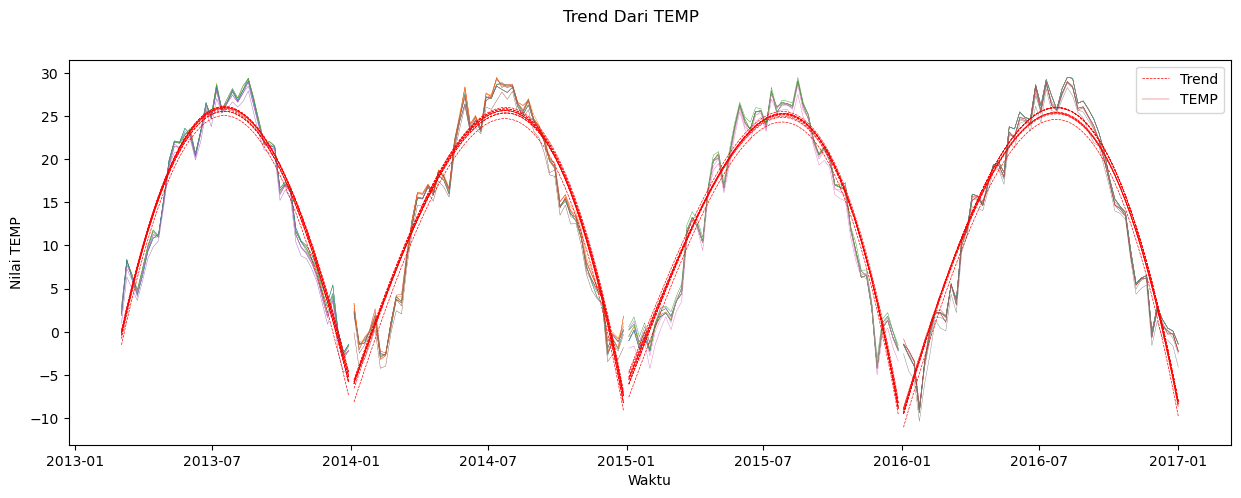

In [98]:
fig, ax = plot_trend("TEMP")
plt.show()

Dapat dilihat bahwa suhu udara meningkat pada pertengahan tahun, dan menurun pada akhir tahun. Dari graf tersebut, kita dapat mengetahui bahwa data yang dianalisis berasal dari kota subtropis dengan 4 musim. Ini diperkuat karena suhu pada musim dingin sampai mendekati bahkan dibawah 0&deg;C. Pada musim dingin akhir 2016 dan 2017 juga dapat dilihat terjadi penurunan suhu yang drastis dari tahun-tahun sebelumnya.

### Pertanyaan 6 : Bagaimana pola jumlah polutan setiap tahunnya ?

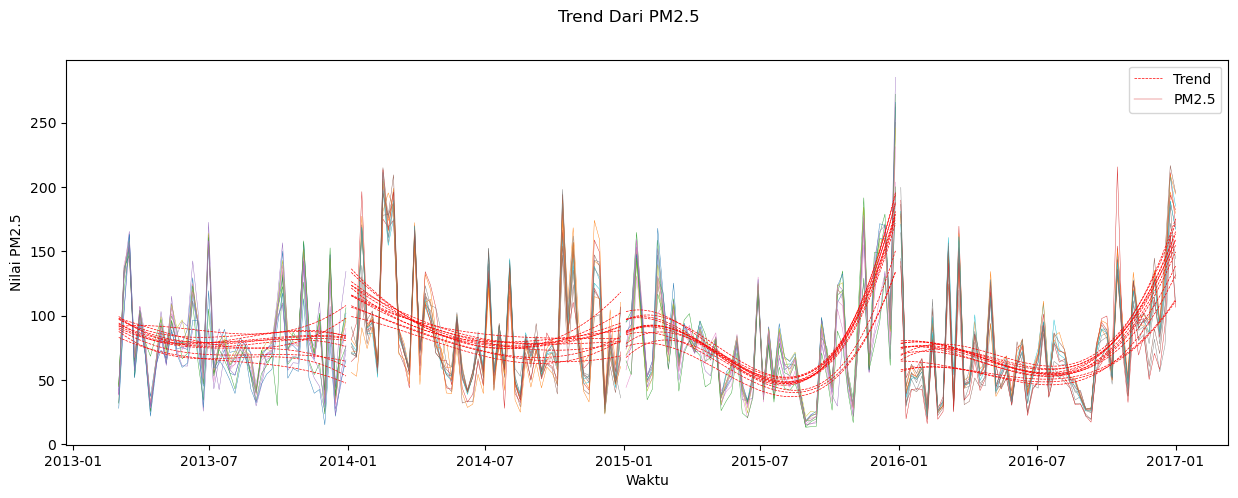

In [99]:
fig, ax = plot_trend("PM2.5")
plt.show()

Dilihat dari tren jumlah PM2.5, jumlah tersebut cenderung meningkat pada akhir taun. Peningkatan polutan naik secara signifikan pada akhir tahun setiap tahunnya. Jumlah polutan pun terlihat meningkat setiap tahunnya, dimana seiring berjalannya waktu, jumlah polutan dalam udara cenderung meningkat. Ini menadakan semakin berjalannya waktu, kualitas udara semakin buruk.

Walaupun hanya metrik PM2.5 yang ditinjau, setiap metrik polutan kecuali O3 memiliki korelasi positif. Jadi dapat disimpulkan bahwa tren PM2.5 hampir serupa dengan tren metrik polutan lainnya kecuali O3.

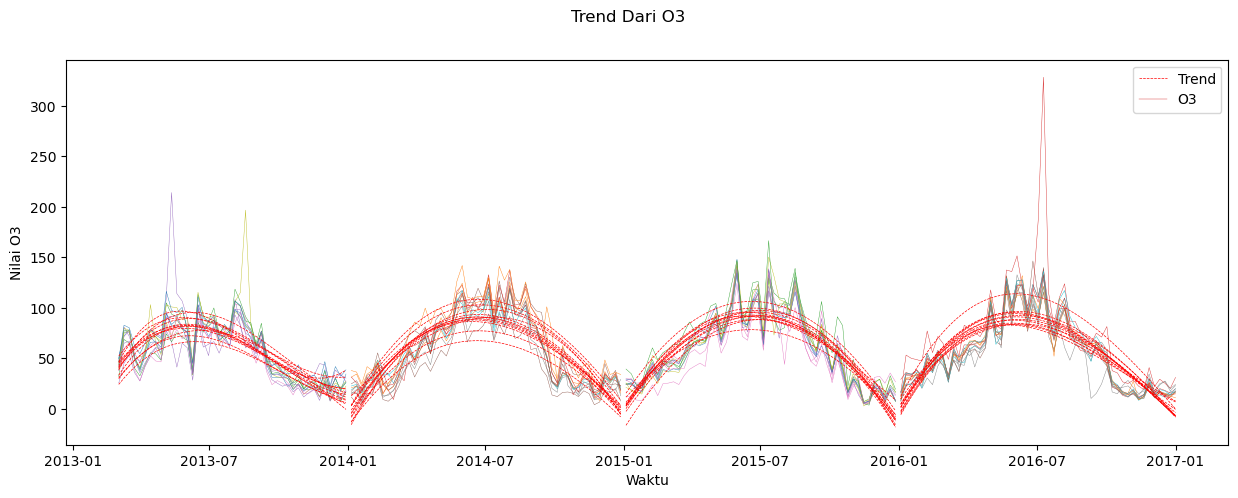

In [100]:
fig, ax = plot_trend("O3")
plt.show()

Tren politan O3 berbanding terbalik dengan polutan lainnya, dimana peningkatan O3 terjadi pada pertengahan tahun dan turun pada akhir tahun. Jumlah O3 dari tahun ke tahun pun terlihat konsisten dan tidak terjadi peningkatan secara signifikan. 

### Pertanyaan 7 : Adakah pola hujan dan angin tertentu setiap tahunnya ??

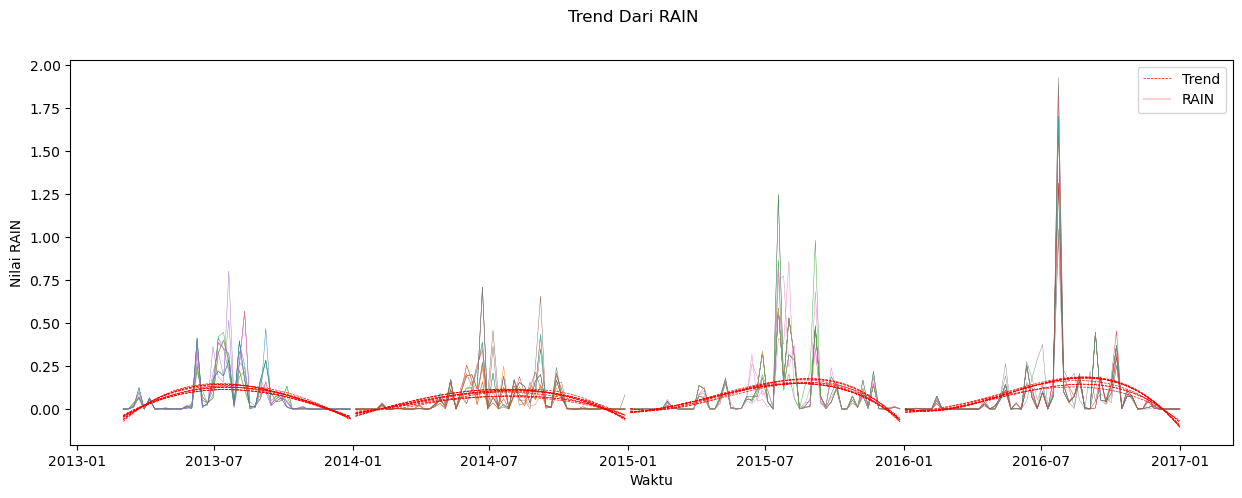

In [102]:
fig, ax = plot_trend("RAIN")
plt.show()

Dari tren diatas, dapat dilihat bahwa hujan mulai terjadi pada pertengahan tahun. Curah hujan pada 2016 terlihat lebih tinggi dari tahun-tahun lainnya. 

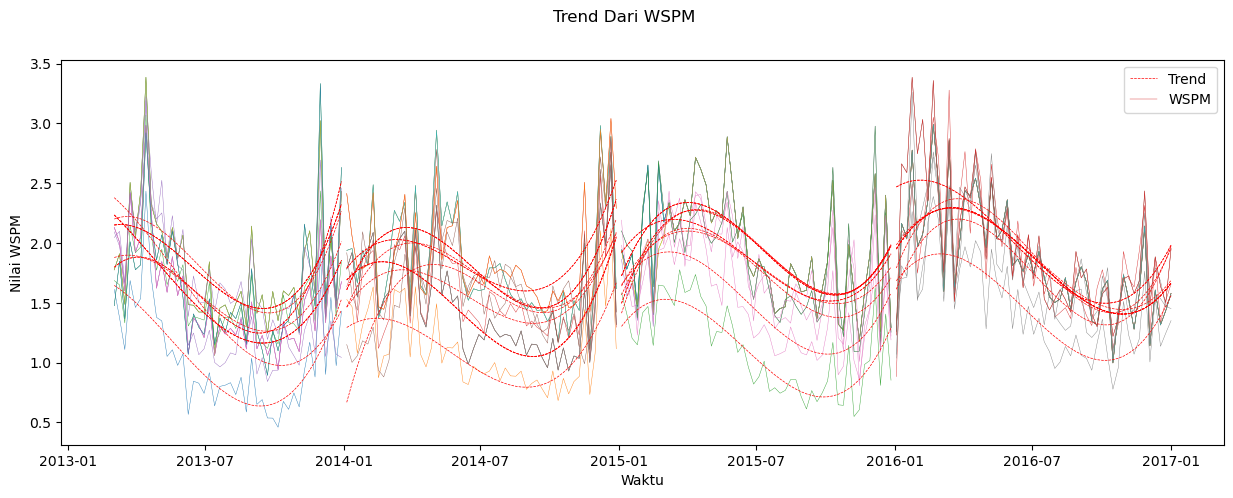

In [101]:
fig, ax = plot_trend("WSPM")
plt.show()

Dari graf diatas terlihat bahwa tren kecepatan angin memiliki puncak pada quartil pertama setiap tahunnya. Ini menandakan bahwa angin cenderung berhembus lebih kencang pada kuartil pertama setiap tahunnya.

## Conclusion

- **Pertanyaan 1**

    Seluruh metrik polusi saling terikat, dimana seluruh metrik cenderung naik secara bersamaan. Ini terkecuali metrik O3, dimana metrik ini memiliki korelasi yang berlawanan.

- **Pertanyaan 2**

    Suhu memiliki korelasi positif yang kuat dengan kelembapan dan korelasi negatif dengan tekanan udara, Dimana suhu yang tinggi cenderung memiliki kelembapan yang tinggi dan tekanan yang rendah dan sebaliknya.

- **Pertanyaan 3**

    Nilai O3 cenderung dipengaruhi oleh temperatur udara, dimana semakin panas udara, semakin tinggi nilai O3. Sedangkan metrik lainnya berlawanan dengan suhu udara, dimana polutan cenderung tinggi saat suhu udara rendah.

- **Pertanyaan 4**

    Dari pola angin kota Gucheng tahun 2016, dapat dilihat bahwa intensitas angin pada awal tahun cenderung tinggi dan dominasi pada arah North, awal pertengahan tahun menunjukan bahwa intensitas arah angin South meningkat, namun pada akhir pertengahan tahun, intensitas angin arah North kembali meningkat.

- **Pertanyaan 5**

    Suhu tinggi cenderung terjadi pada pertengahan tahun, dan suhu terendah terjadi pada akhir dan awal tahun. Dilihat dari nilai temperatur sepanjang tahun, kota yang ditinjau adalah kota subtropis.

- **Pertanyaan 6**

    Polutan cenderung tinggi pada akhir tahun dan awal tahun saat suhu dingin, dan setiap tahunnya jumalah polutan cenderung meningkat. Sedangkan untuk O3, jumlah tersebut cenderung tinggi pada pertengahan tahun saat udara cenderung panas.

- **Pertanyaan 7**

    Curah hujan cenderung tinggi pada pertengahan tahun. 2017 memiliki curah hujan paling tinggi dari tahun-tahun lainnya. Kecepatan angin memiliki puncak di quartil pertama tepat sebelum curah hujan tinggi.